EPS : 0.001 Min : 3


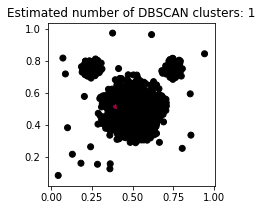

EPS : 0.001 Min : 5


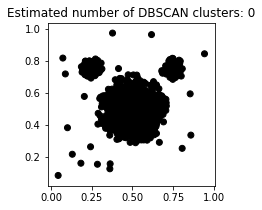

EPS : 0.001 Min : 10


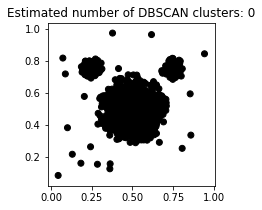

EPS : 0.001 Min : 15


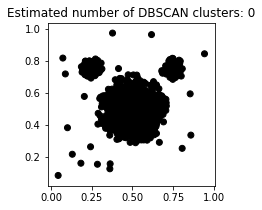

EPS : 0.001 Min : 20


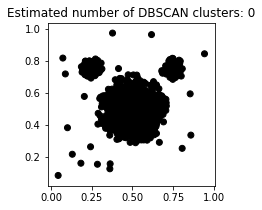

EPS : 0.001 Min : 30


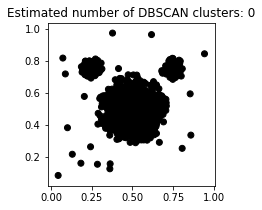

EPS : 0.001 Min : 50


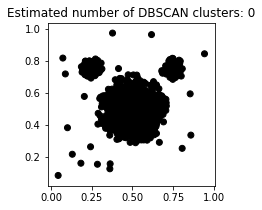

EPS : 0.001 Min : 100


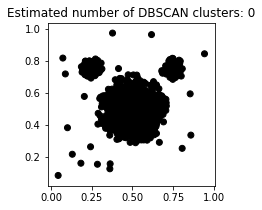

EPS : 0.002 Min : 3


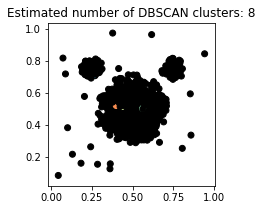

EPS : 0.002 Min : 5


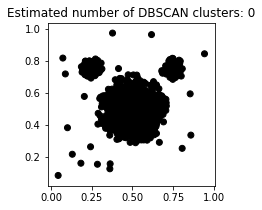

EPS : 0.002 Min : 10


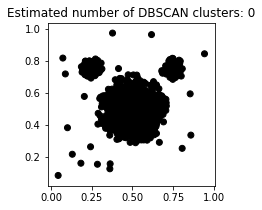

EPS : 0.002 Min : 15


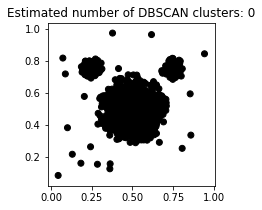

EPS : 0.002 Min : 20


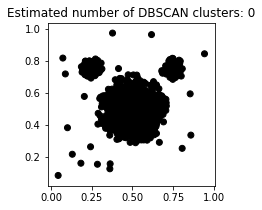

EPS : 0.002 Min : 30


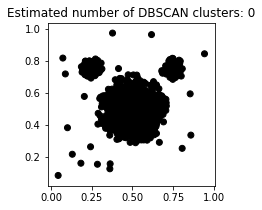

EPS : 0.002 Min : 50


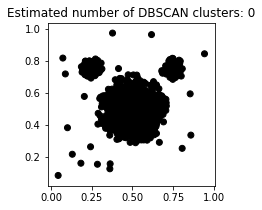

EPS : 0.002 Min : 100


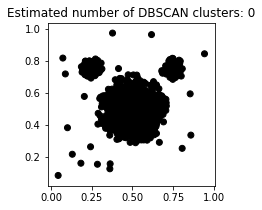

EPS : 0.005 Min : 3


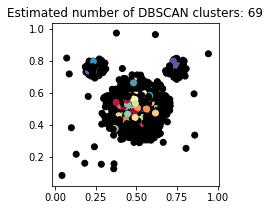

EPS : 0.005 Min : 5


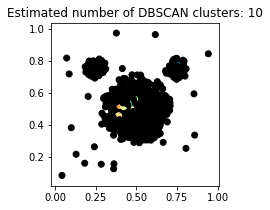

EPS : 0.005 Min : 10


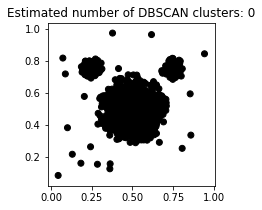

EPS : 0.005 Min : 15


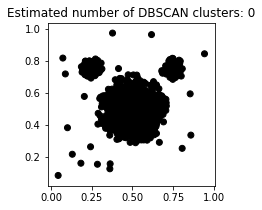

EPS : 0.005 Min : 20


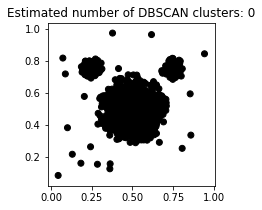

EPS : 0.005 Min : 30


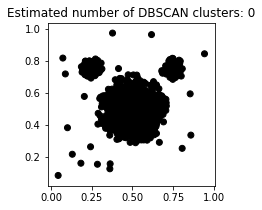

EPS : 0.005 Min : 50


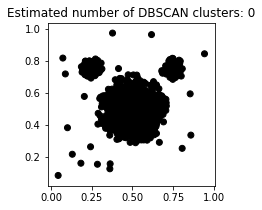

EPS : 0.005 Min : 100


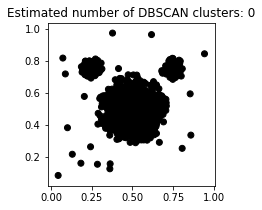

EPS : 0.01 Min : 3


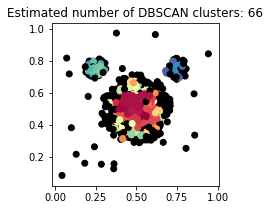

EPS : 0.01 Min : 5


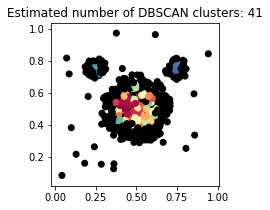

EPS : 0.01 Min : 10


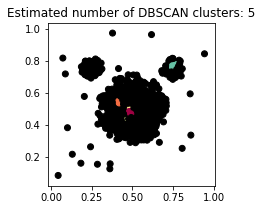

EPS : 0.01 Min : 15


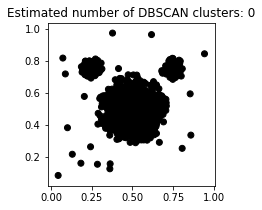

EPS : 0.01 Min : 20


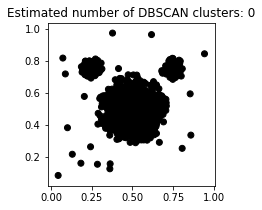

EPS : 0.01 Min : 30


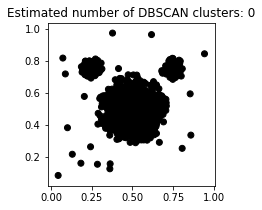

EPS : 0.01 Min : 50


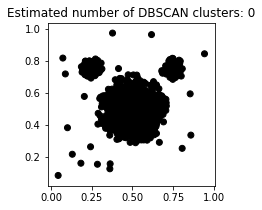

EPS : 0.01 Min : 100


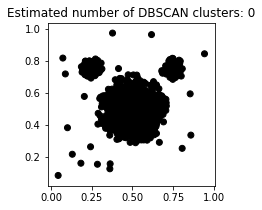

EPS : 0.02 Min : 3


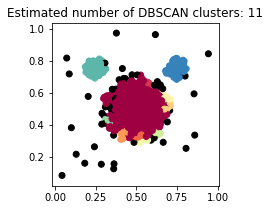

EPS : 0.02 Min : 5


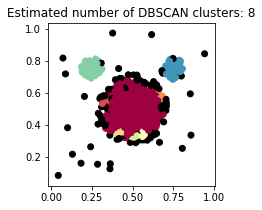

EPS : 0.02 Min : 10


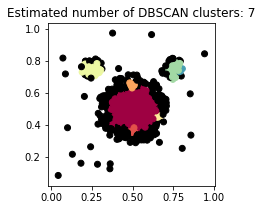

EPS : 0.02 Min : 15


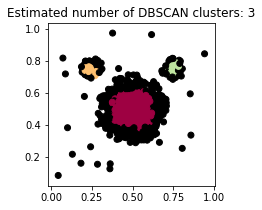

EPS : 0.02 Min : 20


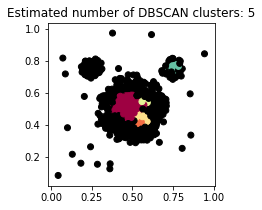

EPS : 0.02 Min : 30


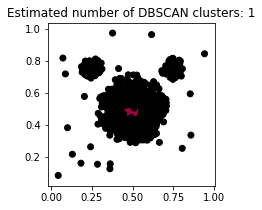

EPS : 0.02 Min : 50


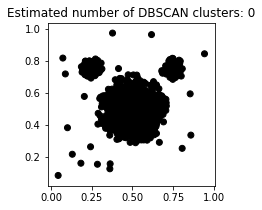

EPS : 0.02 Min : 100


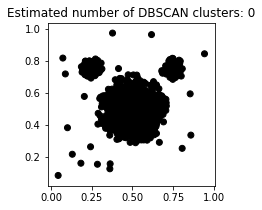

EPS : 0.05 Min : 3


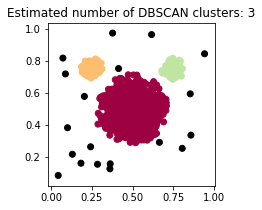

EPS : 0.05 Min : 5


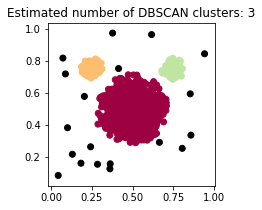

EPS : 0.05 Min : 10


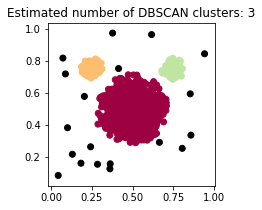

EPS : 0.05 Min : 15


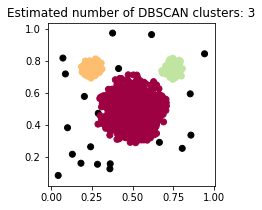

EPS : 0.05 Min : 20


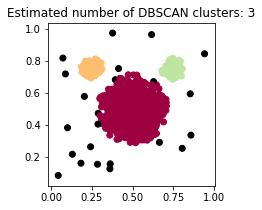

EPS : 0.05 Min : 30


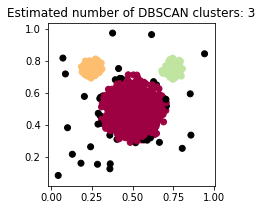

EPS : 0.05 Min : 50


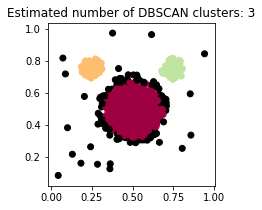

EPS : 0.05 Min : 100


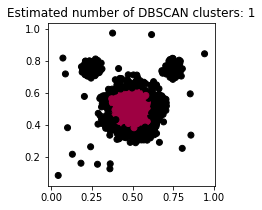

EPS : 0.1 Min : 3


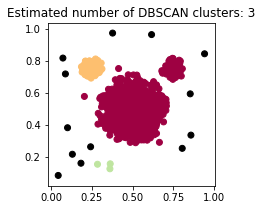

EPS : 0.1 Min : 5


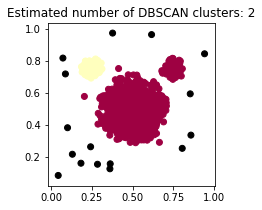

EPS : 0.1 Min : 10


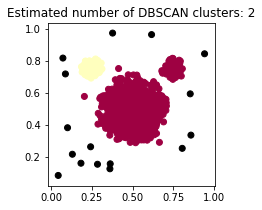

EPS : 0.1 Min : 15


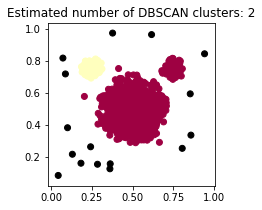

EPS : 0.1 Min : 20


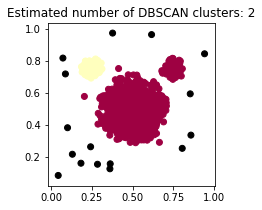

EPS : 0.1 Min : 30


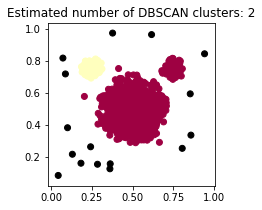

EPS : 0.1 Min : 50


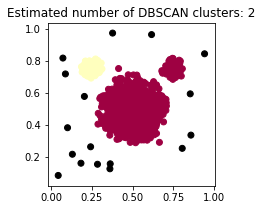

EPS : 0.1 Min : 100


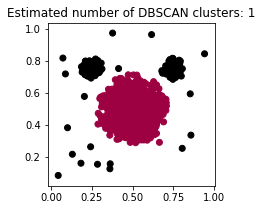

EPS : 0.2 Min : 3


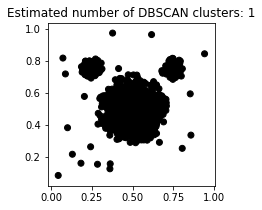

EPS : 0.2 Min : 5


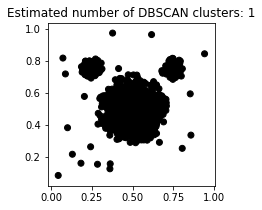

EPS : 0.2 Min : 10


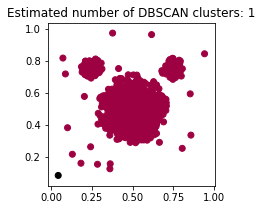

EPS : 0.2 Min : 15


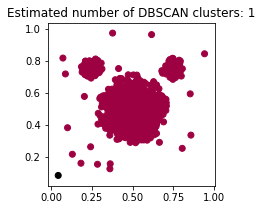

EPS : 0.2 Min : 20


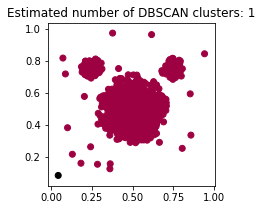

EPS : 0.2 Min : 30


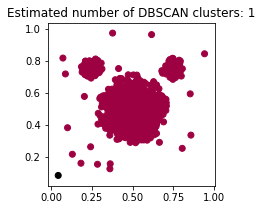

EPS : 0.2 Min : 50


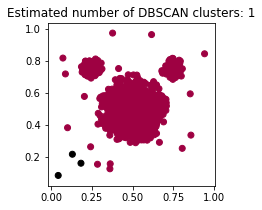

EPS : 0.2 Min : 100


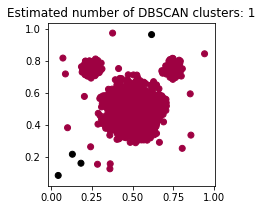

EPS : 0.5 Min : 3


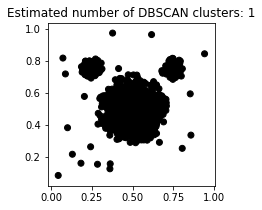

EPS : 0.5 Min : 5


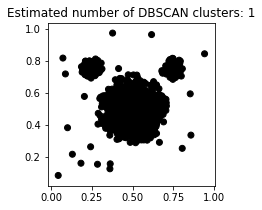

EPS : 0.5 Min : 10


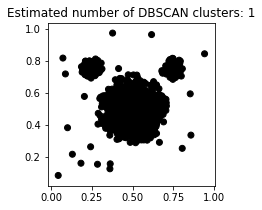

EPS : 0.5 Min : 15


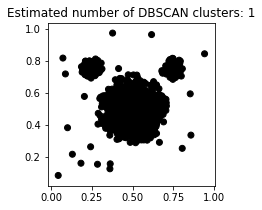

EPS : 0.5 Min : 20


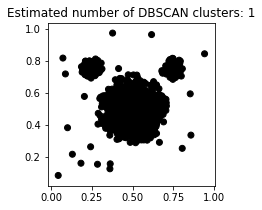

EPS : 0.5 Min : 30


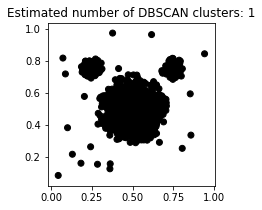

EPS : 0.5 Min : 50


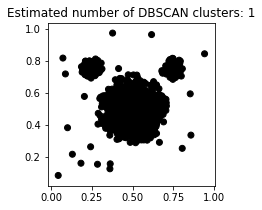

EPS : 0.5 Min : 100


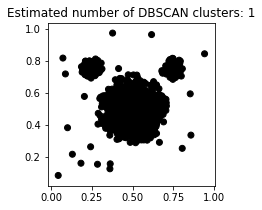

Cluster : 2 Max : 50


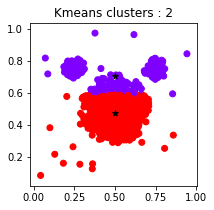

Cluster : 2 Max : 100


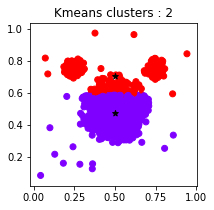

Cluster : 2 Max : 200


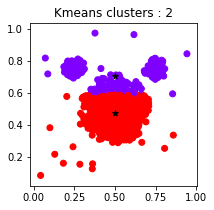

Cluster : 2 Max : 300


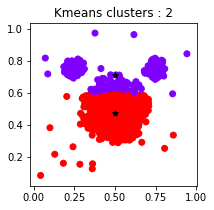

Cluster : 3 Max : 50


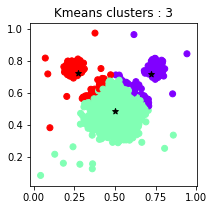

Cluster : 3 Max : 100


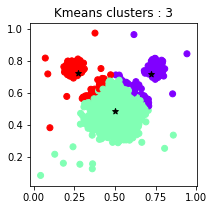

Cluster : 3 Max : 200


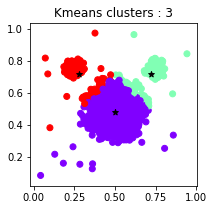

Cluster : 3 Max : 300


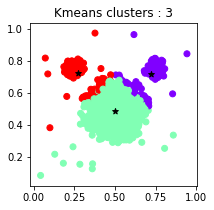

Cluster : 4 Max : 50


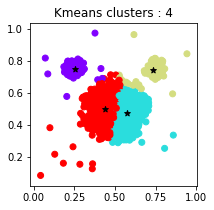

Cluster : 4 Max : 100


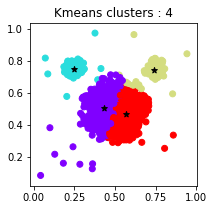

Cluster : 4 Max : 200


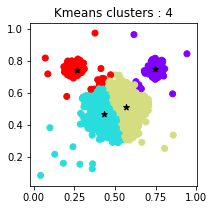

Cluster : 4 Max : 300


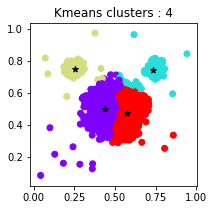

Cluster : 5 Max : 50


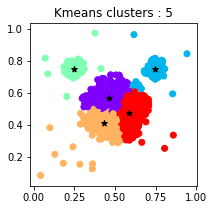

Cluster : 5 Max : 100


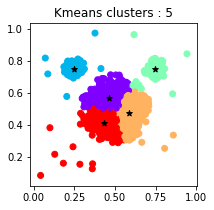

Cluster : 5 Max : 200


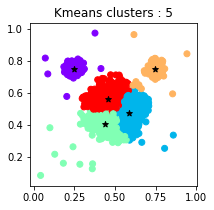

Cluster : 5 Max : 300


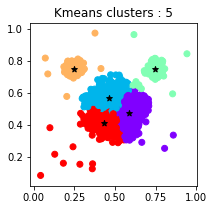

Cluster : 6 Max : 50


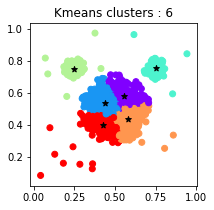

Cluster : 6 Max : 100


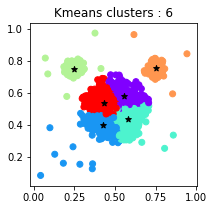

Cluster : 6 Max : 200


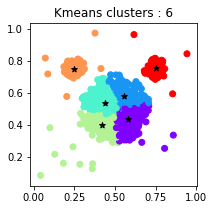

Cluster : 6 Max : 300


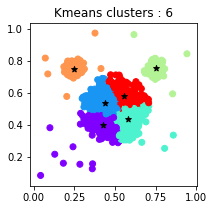

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

# Read dataset
data = np.loadtxt("mouse.csv", delimiter=',')
data = pd.DataFrame(data, columns=["x","y"])

# Draw graph of DBSCAN
def db_func(db):
    
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # Set color of each cluster
    unique_labels = set(labels) # Set each label
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))] # Make color array
    colors[-1] = 'k' # Noise is black
  
    # Building the colour vector for each data point 
    cvec = [colors[label] for label in labels] 
    
    # Set Graph
    plt.figure(figsize = (3, 3))
    plt.scatter(data['x'], data['y'], color = cvec)
     
    plt.title('Estimated number of DBSCAN clusters: %d' % n_clusters_)
    plt.show()

# Kmeans Graph Function
def kmeans_fun(kmeans, cluster):
    # Print each cluster with different color
    # Set Graph
    plt.figure(figsize = (3, 3))
    plt.scatter(data['x'], data['y'], c = kmeans.labels_, cmap='rainbow')
    plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], marker = '*', color='black')
    plt.title('Kmeans clusters : %d' % cluster)
    plt.show()
    

# DBSCAN with various parameter
for eps_num in [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]:
    for min_num in [3, 5, 10, 15, 20, 30, 50, 100]:
        # sklearn
        db = DBSCAN(eps = eps_num, min_samples = min_num).fit(data)
        print('EPS :',eps_num, "Min :", min_num)
        db_func(db)
        
# Kmeans with various parameter
for cluster in [2,3,4,5,6]:
    for max_num in [50, 100, 200, 300]:
            # sklearn
            kmeans = KMeans(n_clusters = cluster, max_iter = max_num).fit(data)
            print('Cluster :',cluster, "Max :",max_num)
            kmeans_fun(kmeans, cluster)